#**Project Amazon Sales Data Analysis**


##Data Preprocessing 

###Import Python Libraries 

Importing necessary libraries for data analysis 



1.   Pandas - This library is used for data manipulation and analysis. It also provides features like efficiently storing and manipulating large datasets and not only that it also provide tools for merging, transforming and cleaning data. 
2.   Numpy - This library is used for scientific computing with python. Generaly it provides support for large, multi-dimensional arrays and matrices. 
3.   Matplotlib - This library help in creating types of visualizations including line plots, scatter plots, bar charts and histograms. 
4.   Seaborn - This library is used for add enhanced aesthetics and additional plotting functions and its based on Matplotlib. 
 



In [73]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pyplot
import seaborn as sns

# %matplotlib inline is a command that enables Matplotlib plots to be displayed inline in Jupyter Notebook, instead of opening a separate window.
%matplotlib inline 

#  Using the pd.read_csv() function to read in a CSV file named "Amazon Sales Records.csv" and stores the data in a Pandas DataFrame named data. The encoding parameter is set to 'latin-1', which specifies the character encoding used in the CSV file.
data = pd.read_csv("Amazon Sales Records.csv",encoding = 'latin-1')

In [74]:
# Show dataframe
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,07-26-2011,512878119,09-03-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,07-30-2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [75]:
# Show columns present in dataframe 
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [76]:
# Show basic information of dataframe like null value count of each column and their data type 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [77]:
# Changing the data type of different column for model training and analysis 
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [78]:
data['Region'] = data['Region'].astype(str)
data['Country'] = data['Country'].astype(str)
data['Item Type'] = data['Item Type'].astype(str)
data['Sales Channel'] = data['Sales Channel'].astype(str)
data['Order Priority'] = data['Order Priority'].astype(str)

In [79]:
# Using describe function on dataframe for getting basic stats of numerical dataset 
data[['Units Sold', 'Unit Price',	'Unit Cost', 'Total Revenue', 'Total Cost',	'Total Profit']].describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [80]:
# Adding extra column to dataframe which contain only month, year and month with year 
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Date MonthYear'] = data['Order Date'].dt.strftime('%Y-%m')
data = data.drop(columns=['Order Date'])

In [81]:
# Saving the data dataframe to df 
df = data

In [82]:
# Checking out total null value in the all the column of dataframe 
df.isnull().sum()

Region                  0
Country                 0
Item Type               0
Sales Channel           0
Order Priority          0
Order ID                0
Ship Date               0
Units Sold              0
Unit Price              0
Unit Cost               0
Total Revenue           0
Total Cost              0
Total Profit            0
Order Month             0
Order Year              0
Order Date MonthYear    0
dtype: int64

In [83]:
# Display total values of all country 
pd.set_option('display.max_rows', None)
df['Country'].value_counts()

The Gambia                          4
Sierra Leone                        3
Sao Tome and Principe               3
Mexico                              3
Australia                           3
Djibouti                            3
Switzerland                         2
Myanmar                             2
Norway                              2
Turkmenistan                        2
Cameroon                            2
Bulgaria                            2
Honduras                            2
Azerbaijan                          2
Libya                               2
Rwanda                              2
Mali                                2
Gabon                               1
Belize                              1
Haiti                               1
Lithuania                           1
San Marino                          1
United Kingdom                      1
Austria                             1
Fiji                                1
Madagascar                          1
Cote d'Ivoir

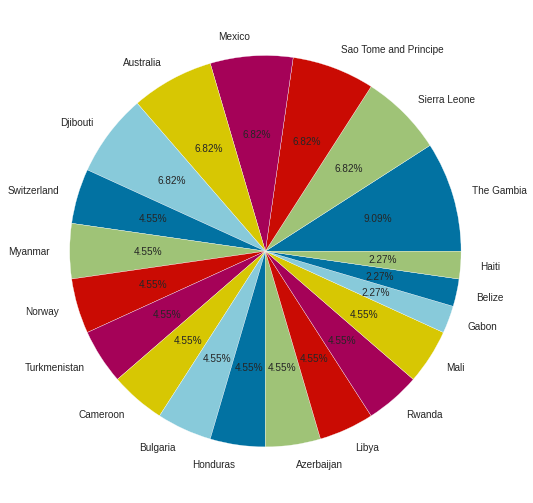

In [84]:
import matplotlib.pyplot as plt 
country_names = df.Country.value_counts().index
country_val = df.Country.value_counts().values
# Pie Chart for top 20 country
fig,ax = plt.subplots(figsize=(9,9))
ax.pie(country_val[:20],labels=country_names[:20],autopct='%1.2f%%')
plt.show()

#Exploratory Data Analysis 

###Checking Outliers in the dataframe



Box Plot for Total Profit

The first line imports the Matplotlib pyplot module and assigns it to the variable 'plt'. The second line imports the Seaborn library and sets the plot style to 'white'. The third line creates a figure with a size of 10 inches by 2 inches using the subplots() function and assigns the plot object to the variables 'fig' and 'ax'. This allows for further customization of the plot. The fourth line creates a boxplot of the 'Total Profit' variable in the dataset using the Seaborn boxplot() function. The 'color' parameter sets the color of the boxes to 'plum' and the 'width' parameter sets the width of the boxes to 0.6.
The fifth line adds a title to the plot and sets the font size to 13. The sixth line adds a label to the x-axis. The last line displays the plot using the show() function.



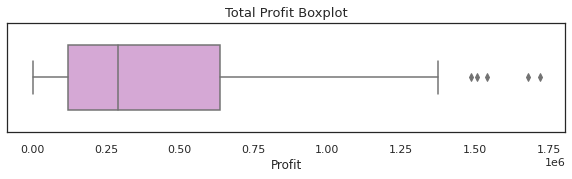

In [85]:
import matplotlib.pyplot as plt
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Total Profit'], color="plum", width=.6)

plt.title('Total Profit Boxplot', fontsize=13)
plt.xlabel('Profit')
plt.show()

The function 'detect_outliers' takes in two arguments: a pandas DataFrame 'dataframe' and a column name 'column'. It aims to detect outliers in the specified column using the Z-score method.

The Z-score method assumes that the data follows a normal distribution and detects outliers as values that fall outside a certain number of standard deviations from the mean. In this case, the threshold is set to 2 standard deviations.

The function first calculates the mean and standard deviation of the column. It then loops through each value in the column and calculates its Z-score. If the absolute Z-score is greater than the threshold, the function appends the index of the outlier to a list and prints the corresponding row of the DataFrame. Finally, the function returns the list of outlier indices.

Note that the function requires the 'numpy' library to be imported and assumes that the column values are numeric. Also, the function prints the corresponding rows of the DataFrame where the outliers are found, but this may not be desirable if the DataFrame is large.

In [86]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 2rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [87]:
outliers = detect_outliers(df, df["Total Profit"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                               Europe
Coun

In [88]:
# Print rows where outlier is present for the Total Profit column value
print(outliers)

[13, 30, 33, 46, 74, 79, 93]


In [89]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Profit column of dataframe data ")

The list has 7 outliers in Total Profit column of dataframe data 


Box Plot of Total Cost 

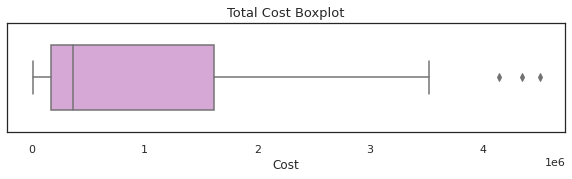

In [90]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Total Cost'], color="plum", width=.6)

plt.title('Total Cost Boxplot', fontsize=13)
plt.xlabel('Cost')
plt.show()

In [91]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 3rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [92]:
outliers = detect_outliers(df, df["Total Cost"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                                 Asia
Coun

In [93]:
# Print rows where outlier is present for the Total Cost column value
print(outliers)

[13, 33, 38, 68, 75]


In [94]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Cost column of dataframe data ")

The list has 5 outliers in Total Cost column of dataframe data 


Box Plot of Total Revenue

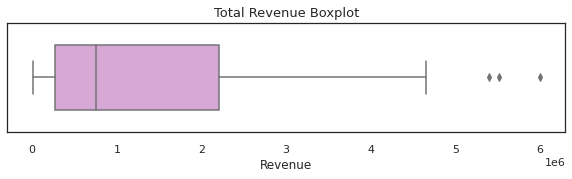

In [95]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Total Revenue'], color="plum", width=.6)

plt.title('Total Revenue Boxplot', fontsize=13)
plt.xlabel('Revenue')
plt.show()

In [96]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 3rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [97]:
outliers = detect_outliers(df, df["Total Revenue"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                                 Asia
Coun

In [98]:
# Print rows where outlier is present for the Total Revenue column value
print(outliers)

[13, 33, 38, 68, 74, 75]


In [99]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Revenue column of dataframe data ")

The list has 6 outliers in Total Revenue column of dataframe data 


Box Plot of Unit Cost 

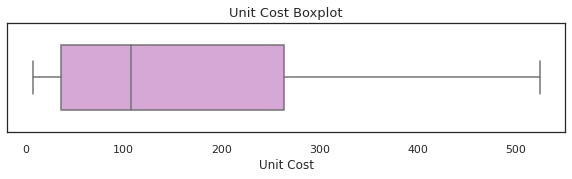

In [100]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Unit Cost'], color="plum", width=.6)
plt.title('Unit Cost Boxplot', fontsize=13)
plt.xlabel('Unit Cost')
plt.show()

Box Plot of Unit Price

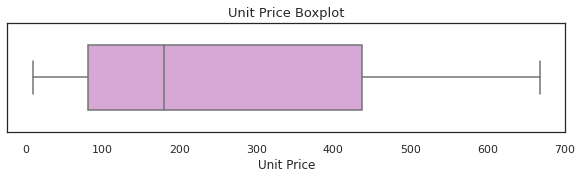

In [101]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Unit Price'], color="plum", width=.6)
plt.title('Unit Price Boxplot', fontsize=13)
plt.xlabel('Unit Price')
plt.show()

Box Plot of Unit Sold 

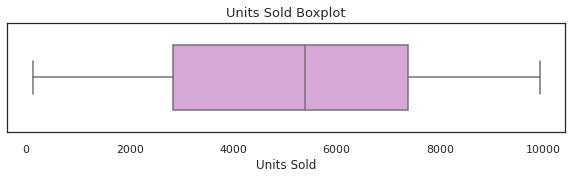

In [102]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Units Sold'], color="plum", width=.6)

plt.title('Units Sold Boxplot', fontsize=13)
plt.xlabel('Units Sold')
plt.show()

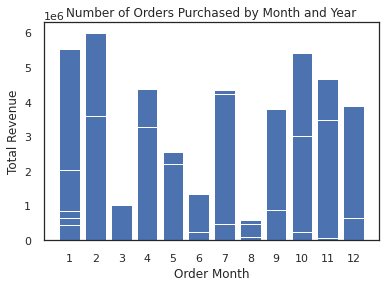

In [103]:
# Creating a bar chart for Total Revenue and Order Month 
plt.bar(df['Order Month'], df['Total Revenue'])

# Set the chart title and axis labels
plt.title('Number of Orders Purchased by Month and Year')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')

# Rotate the x-axis labels for better readability

# Display the chart
plt.show()

Text(0.5, 1.0, 'Profit per year')

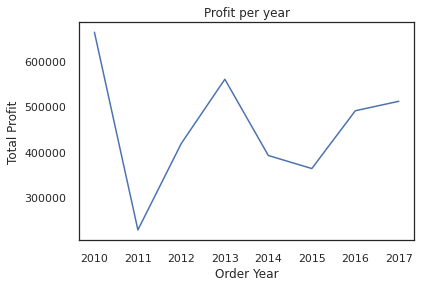

In [104]:
# Plot line graph of Total Profit and Order Year
df.groupby('Order Year')['Total Profit'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.title('Profit per year')

In [105]:
# Calculating the total revenue for each group with respect to Item Type and then sorting then in descending order
revenue_by_category = df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
revenue_by_category

Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total Revenue, dtype: float64

In [106]:
# Calculating the total profit for each group with respect to Item Type and then sorting then in descending order
profit_by_category = df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)
profit_by_category

Item Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Cereal              2292443.43
Vegetables          1265819.63
Personal Care       1220622.48
Beverages            888047.28
Snacks               751944.18
Meat                 610610.00
Fruits               120495.18
Name: Total Profit, dtype: float64

In [107]:
# Calculating correlation of 'Total Revenue', 'Total Cost' and 'Total Profit' columns present in dataframe
print(df[['Total Revenue', 'Total Cost', 'Total Profit']].corr())

               Total Revenue  Total Cost  Total Profit
Total Revenue       1.000000    0.983928      0.897327
Total Cost          0.983928    1.000000      0.804091
Total Profit        0.897327    0.804091      1.000000


##Predictive Analytics 

In [108]:
# Label Encoding of Item Type, Sales Channel and Order Priority for model training 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df["Item Type"] = le.fit_transform(df["Item Type"])
df["Sales Channel"] = le.fit_transform(df["Sales Channel"])
df["Order Priority"] = le.fit_transform(df["Order Priority"])

In [109]:
# Drop columns Region, Country, Order Date MonthYear, Order ID and Ship Date 
df = df.drop("Region", axis=1)
df = df.drop("Country", axis=1)
df = df.drop("Order Date MonthYear", axis=1)
df = df.drop("Order ID", axis=1)
df = df.drop("Ship Date", axis=1)

In [110]:
df.head()

,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
0,0,0,1,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010
1,2,1,0,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012
2,8,0,2,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014
3,5,1,0,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014
4,8,0,2,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013


##Using Pycaret library 

PyCaret is an open-source, low-code machine learning library in Python that allows users to quickly and easily build, compare, and deploy machine learning models on structured and tabular data. It is designed to streamline the machine learning workflow and reduce the amount of code needed to build a model, while still providing users with a high degree of flexibility and control over the modeling process.

PyCaret provides a variety of pre-processing methods, feature engineering techniques, and model selection strategies that can be easily applied to a dataset with just a few lines of code. It also includes a range of tools for model interpretation, such as feature importance plots and SHAP value plots.

Some of the key features of PyCaret include:

*   Preprocessing and feature engineering functions
*   Automatic model selection and hyperparameter tuning
*   Interpretation tools for model results
*   Support for a wide range of machine learning algorithms
*   Deployment of models to production


In [111]:
# Storing df dataframe in df_auto_ml for performing (Auto ML) Pycaret library 
df_auto_ml = df

In [112]:
# Install pycaret dependency 
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
# Import * to train dataframe on multiple regression algorithm  
from pycaret.regression import *

In [114]:
# Set target value
reg = setup(data=df_auto_ml,target='Total Profit')

,Description,Value
0,Session id,6005
1,Target,Total Profit
2,Target type,Regression
3,Original data shape,"(100, 11)"
4,Transformed data shape,"(100, 11)"
5,Transformed train set shape,"(70, 11)"
6,Transformed test set shape,"(30, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [115]:
# Comparing multiple models 
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0446,0.0074,0.0723,1.0000,0.0000,0.0000,0.4870
ridge,Ridge Regression,0.0445,0.0074,0.0722,1.0000,0.0000,0.0000,0.0530
lar,Least Angle Regression,0.0470,0.0079,0.0749,1.0000,0.0000,0.0000,0.0480
llar,Lasso Least Angle Regression,0.0394,0.0062,0.0663,1.0000,0.0000,0.0000,0.0660
br,Bayesian Ridge,0.0446,0.0074,0.0723,1.0000,0.0000,0.0000,0.0850
par,Passive Aggressive Regressor,99.4826,42970.2614,153.5504,1.0000,0.0019,0.0011,0.0950
huber,Huber Regressor,0.0665,0.0111,0.0927,1.0000,0.0000,0.0000,0.1080
en,Elastic Net,6591.6920,79198477.0187,8103.7242,0.9987,0.2946,0.5179,0.0430
lasso,Lasso Regression,6985.4503,88575959.2734,8629.1088,0.9986,0.3355,0.5274,0.0440
et,Extra Trees Regressor,63762.1642,10550514574.9109,93568.4784,0.8162,0.3781,0.5041,0.6110


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

In [116]:
# Using Lasso Least Angle Regression algorithm to train model 
llar_model = create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0215,0.0008,0.0281,1.0000,0.0000,0.0000
1,0.0759,0.0173,0.1315,1.0000,0.0000,0.0000
2,0.0202,0.0008,0.0289,1.0000,0.0000,0.0000
3,0.0704,0.0184,0.1356,1.0000,0.0000,0.0000
4,0.0169,0.0004,0.0192,1.0000,0.0000,0.0000
5,0.0671,0.0099,0.0996,1.0000,0.0000,0.0000
6,0.0178,0.0010,0.0308,1.0000,0.0000,0.0000
7,0.0418,0.0066,0.0811,1.0000,0.0000,0.0000
8,0.0207,0.0008,0.0279,1.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [117]:
# Tuning the model for better performance 
tuned_llar_model = tune_model(llar_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0214,0.0008,0.0281,1.0000,0.0000,0.0000
1,0.0759,0.0173,0.1316,1.0000,0.0000,0.0000
2,0.0201,0.0008,0.0288,1.0000,0.0000,0.0000
3,0.0705,0.0184,0.1357,1.0000,0.0000,0.0000
4,0.0171,0.0004,0.0195,1.0000,0.0000,0.0000
5,0.0670,0.0099,0.0995,1.0000,0.0000,0.0000
6,0.0178,0.0009,0.0308,1.0000,0.0000,0.0000
7,0.0417,0.0066,0.0810,1.0000,0.0000,0.0000
8,0.0206,0.0008,0.0278,1.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


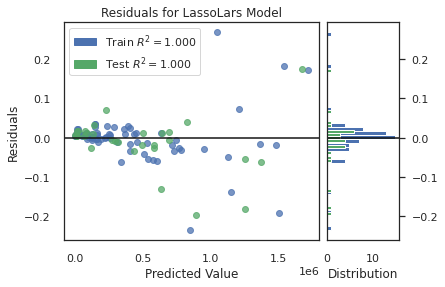

In [118]:
# Plot residuals for Lasso Least Angle Regression based trained model 
plot_model(tuned_llar_model)

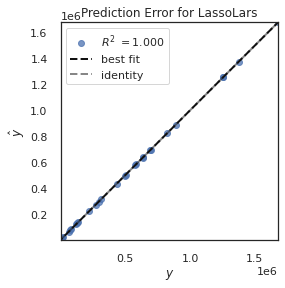

In [119]:
# Plot prediction error plot for Lasso Least Angle Regression based trained model 
plot_model(tuned_llar_model, plot="error")

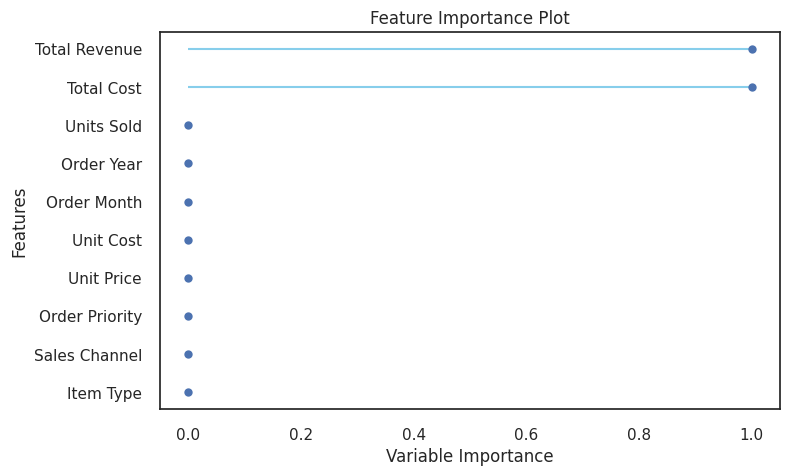

In [120]:
# Plot feature importance plot 
plot_model(tuned_llar_model,plot='feature')

In [121]:
# Predicting total profit using Lasso Least Angle Regression based trained model 
predict_model(tuned_llar_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Least Angle Regression,0.0405,0.0046,0.0677,1.0000,0.0000,0.0000


,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Month,Order Year,Total Profit,prediction_label
70,8,1,3,5518,651.210022,524.960022,3.593377e+06,2.896729e+06,11,2011,6.966475e+05,6.966475e+05
71,1,0,0,5430,47.450001,31.790001,2.576535e+05,1.726197e+05,4,2015,8.503380e+04,8.503381e+04
72,3,1,1,5930,109.279999,35.840000,6.480304e+05,2.125312e+05,11,2015,4.354992e+05,4.354992e+05
73,5,1,3,5398,9.330000,6.920000,5.036334e+04,3.735416e+04,10,2014,1.300918e+04,1.300920e+04
74,5,1,2,673,9.330000,6.920000,6.279090e+03,4.657160e+03,8,2015,1.621930e+03,1.621936e+03
75,3,1,2,7884,109.279999,35.840000,8.615635e+05,2.825626e+05,9,2012,5.790009e+05,5.790009e+05
76,4,0,1,2847,437.200012,263.329987,1.244708e+06,7.497005e+05,2,2015,4.950079e+05,4.950079e+05
77,4,1,1,7910,437.200012,263.329987,3.458252e+06,2.082940e+06,11,2010,1.375312e+06,1.375312e+06
78,11,1,1,124,154.059998,90.930000,1.910344e+04,1.127532e+04,6,2011,7.828120e+03,7.828124e+03
79,11,1,1,171,154.059998,90.930000,2.634426e+04,1.554903e+04,10,2012,1.079523e+04,1.079523e+04


##Implement Linear Regression 

In [122]:
# Select the independent variables and target variable
X = df[['Item Type', 'Sales Channel', 'Order Priority', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Order Month', 'Order Year']]
y = df['Total Profit']

In [123]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [124]:
# Standardizing the dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [125]:
# Performing fit transform on X_train dataframe 
X_train = scaler.fit_transform(X_train)

In [126]:
# Performing transform on X_test dataframe 
X_test = scaler.transform(X_test)

In [127]:
# Applying Linear Regression on X_train and y_train
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [128]:
# Calculating mean squared error 
mse = cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=5)

In [129]:
np.mean(mse)

-6.727059692031499e-19

In [130]:
## prediction 
reg_pred = regression.predict(X_test)

In [131]:
reg_pred

array([2.25246900e+05, 4.36446250e+05, 6.32512500e+05, 8.52235800e+04,
       4.35499200e+05, 5.03358750e+05, 1.22686500e+05, 7.47939490e+05,
       7.82812000e+03, 9.51410500e+05, 6.34745900e+05, 1.50588807e+06,
       7.66835040e+05, 1.36727250e+06, 1.19685000e+05, 6.39077500e+05,
       1.46875140e+05, 2.35601160e+05, 6.06834720e+05, 5.32525000e+04,
       2.55718080e+05, 1.25802000e+03, 1.30091800e+04, 1.87545030e+05,
       5.39196480e+05, 1.22865120e+05, 7.55559000e+04, 1.51034700e+04,
       5.84073870e+05, 8.99040600e+04])

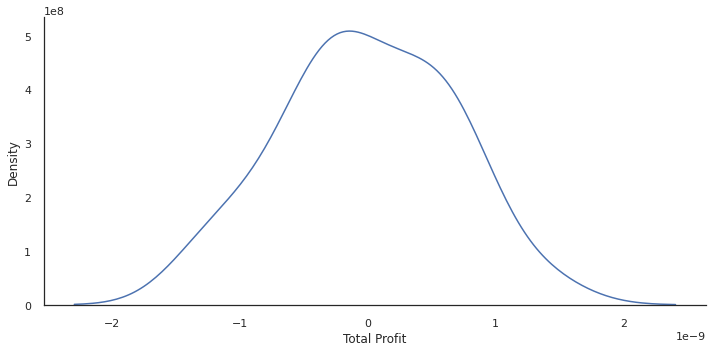

In [132]:
# Creating kernel density estimate plot 
import seaborn as sns 
sns.displot(reg_pred - y_test,kind='kde', height=5, aspect=2)

In [133]:
# Finding Accuracy percentage on the bases of r2 score 
from sklearn.metrics import r2_score
score = r2_score(reg_pred,y_test)

# Calculate the percentage of accuracy
accuracy_pct = score * 100

print("Accuracy: {:.2f}%".format(accuracy_pct))

# SVM AND LR to apply 

Accuracy: 100.00%


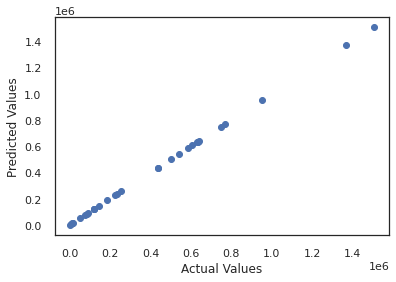

In [134]:
# Plot the predicted values against the actual values to visualize how well the model is fitting the data.
import matplotlib.pyplot as plt

plt.scatter(y_test, reg_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [135]:
# Calculate the mean squared error (MSE) or root mean squared error (RMSE) to quantify the model's performance.

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, reg_pred)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)

MSE: 4.2851929643772975e-19
RMSE: 6.546138529222627e-10


In [136]:
import plotly.graph_objs as go
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a linear regression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate the R-squared score
r2 = reg.score(X_test, y_test)

# Create a copy of the X_train numpy array with modified column names
X_train_df = pd.DataFrame(X_train, columns=['Item Type', 'Sales Channel', 'Order Priority', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Order Month', 'Order Year'])

# Extract the coefficients of the linear regression model
coef = reg.coef_

# Create a DataFrame with the coefficients and feature names
feature_importances = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': coef})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Create a bar chart of the feature importances using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=feature_importances['Feature'], y=feature_importances['Importance']))
fig.update_layout(title='Feature Importance (R-squared = {:.2f})'.format(r2),
                  xaxis_title='Feature',
                  yaxis_title='Importance',
                  xaxis_tickangle=-45)
fig.show()
